# Data Exploration Notebook

This notebook contains code to explore text data from the IMDB Dataset.

In [19]:
import pandas as pd

data = pd.read_csv('/Users/fpolygon/Documents/Sentiment Analysis of Movie Reviews/data/raw/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [20]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


review       0
sentiment    0
dtype: int64

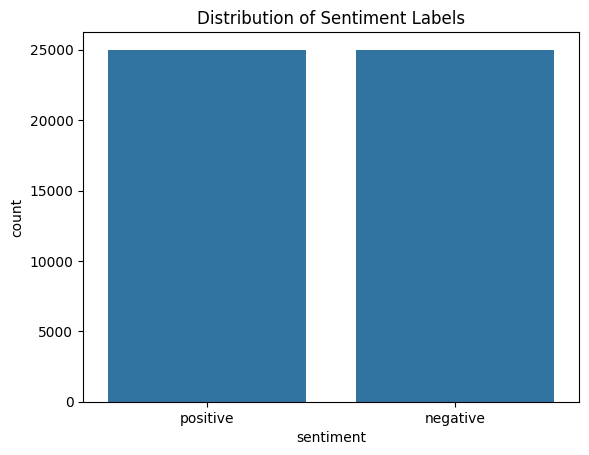

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiment Labels')
plt.show()

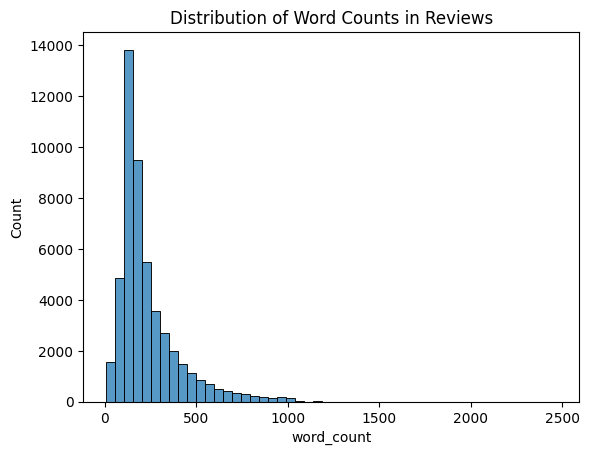

In [29]:
data['word_count'] = data['review'].apply(lambda x: len(x.split()))
sns.histplot(data['word_count'], bins=50)
plt.title('Distribution of Word Counts in Reviews')
plt.show()


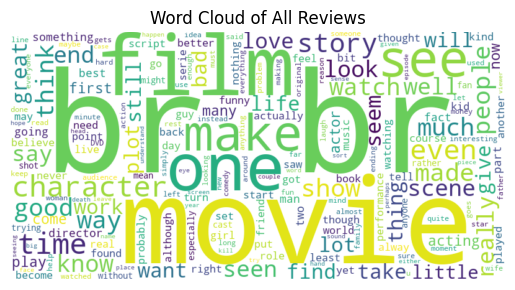

In [31]:
from collections import Counter
from wordcloud import WordCloud

all_words = ' '.join(data['review'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()


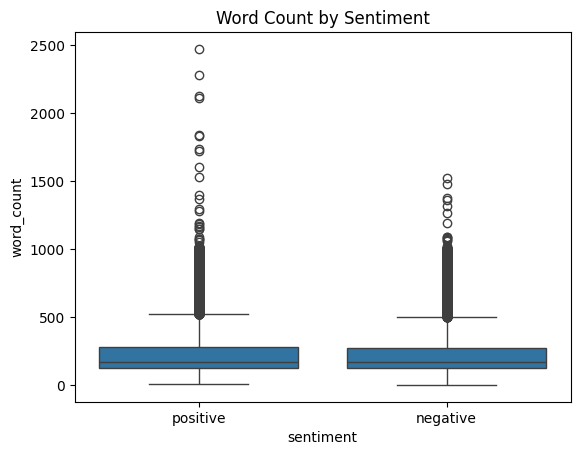

In [32]:
sns.boxplot(x='sentiment', y='word_count', data=data)
plt.title('Word Count by Sentiment')
plt.show()


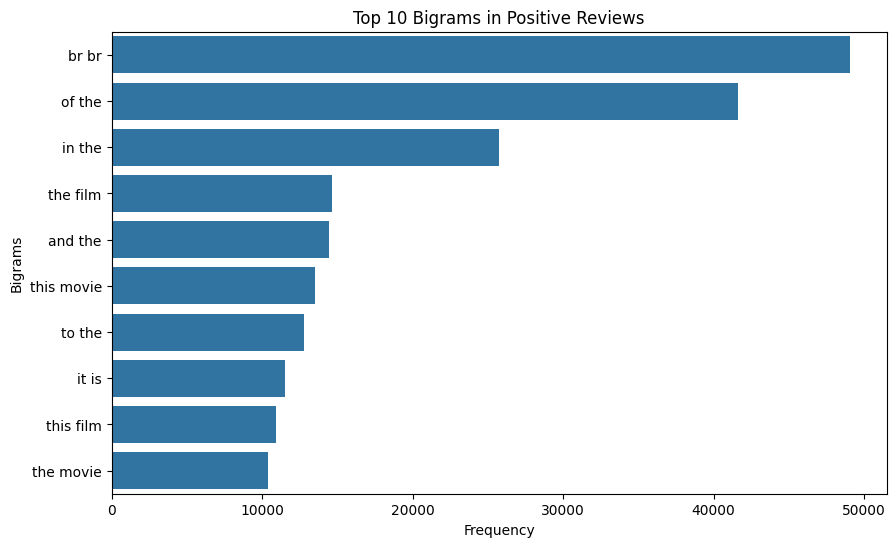

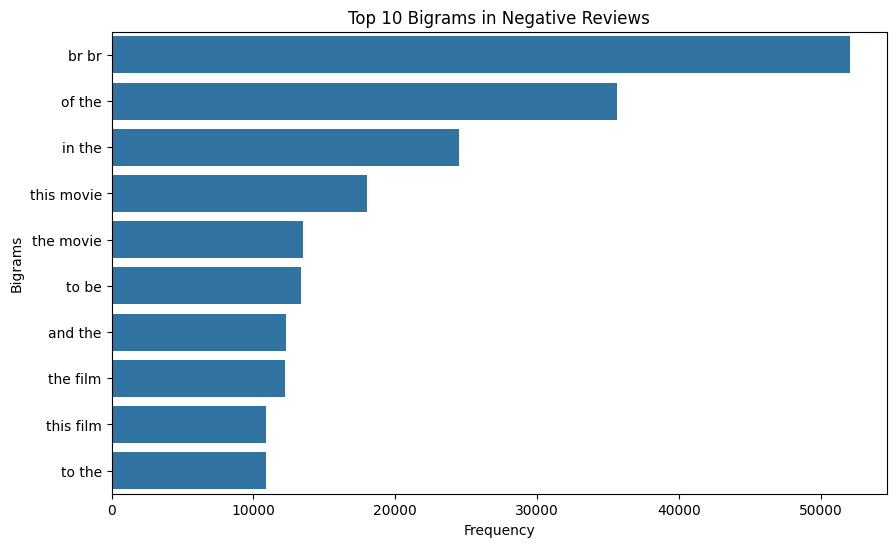

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Assuming data is already loaded and preprocessed

def plot_top_ngrams(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    words_freq = words_freq[:n]
    return words_freq

def plot_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()

# Split the data into positive and negative reviews
positive_reviews = data[data['sentiment'] == 'positive']['review']
negative_reviews = data[data['sentiment'] == 'negative']['review']

# Get top 10 bigrams for positive and negative reviews
positive_bigrams = plot_top_ngrams(positive_reviews, ngram_range=(2, 2), n=10)
negative_bigrams = plot_top_ngrams(negative_reviews, ngram_range=(2, 2), n=10)

# Plot the top bigrams
plot_ngrams(positive_bigrams, 'Top 10 Bigrams in Positive Reviews')
plot_ngrams(negative_bigrams, 'Top 10 Bigrams in Negative Reviews')

